In [1]:
# dataset
from sklearn.datasets import load_diabetes

# maths and eda
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Load in the Diabetes dataset


In [2]:
diabetes=load_diabetes()
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

X = df['s2'].astype('float64').values
y = df['s1'].astype('float64').values #Must set dtype for sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=.2)

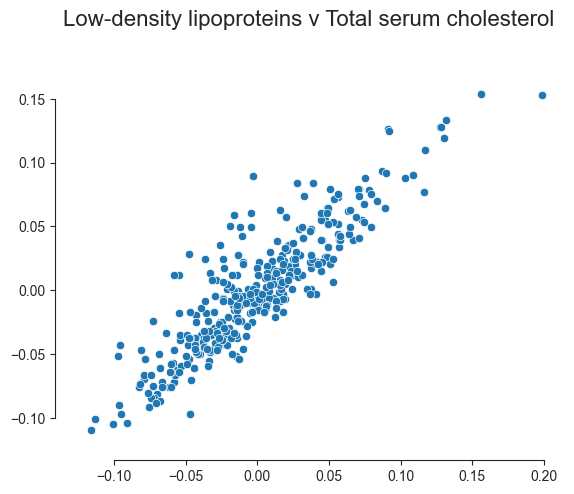

In [3]:
sns.set_style("ticks")
sns.scatterplot(x=X_train,y=y_train)
plt.suptitle('Low-density lipoproteins v Total serum cholesterol',y=1.02,fontsize=16)
sns.despine(offset=10, trim=True)
plt.show()

# Implementing a Simple Linear Regression

## Ordinary Least Squares Method
To fit a line $y=b+mx$ to the data using least squares 

In [4]:
def ols(X_train,y_train):
    # size of training set
    n=float(len(X_train))

    # start with the mean
    y_avg=y_train.mean()
    x_avg=X_train.mean()

    # sum of squares around the mean
    y_SS=np.sum((y_train-y_avg)**2)
    x_SS=np.sum((X_train-x_avg)**2)

    # calculate the covariance
    covar=np.sum((X_train-x_avg)*(y_train-y_avg))

    # slope
    m=covar/x_SS

    # y-axis intercept
    b=float(y_avg-(m*x_avg))

    # line
    print(f"y={b:.6f}+{m:.6f}x")
    return b,m,y_SS

def sse(b,m):
    # calculate sum of squared errors
    y_predict=b+m*X_train
    SSE=np.sum((y_train-y_predict)**2)
    print(f"SSE={SSE}")
    return SSE

b_ols,m_ols,y_SS=ols(X_train,y_train)
SSE=sse(b_ols,m_ols)

y=0.000165+0.893956x
SSE=0.1655850151192482


#### calculate $R^2$ where $R^2$ tells us how much variation in $y$ can be expained by taking $x$ into account therefore, $R^2=\frac{var(mean)-var(fit)}{var(mean)}=1-\frac{var(fit)}{var(mean)}$

In [5]:
R_squared = 1 - (SSE / y_SS)
print(f"R2={R_squared}")
print(f"Low-density lipoproteins explains {R_squared*100:.2f}% of the variation in Total serum cholesterol")

R2=0.7939937125088611
Low-density lipoproteins explains 79.40% of the variation in Total serum cholesterol


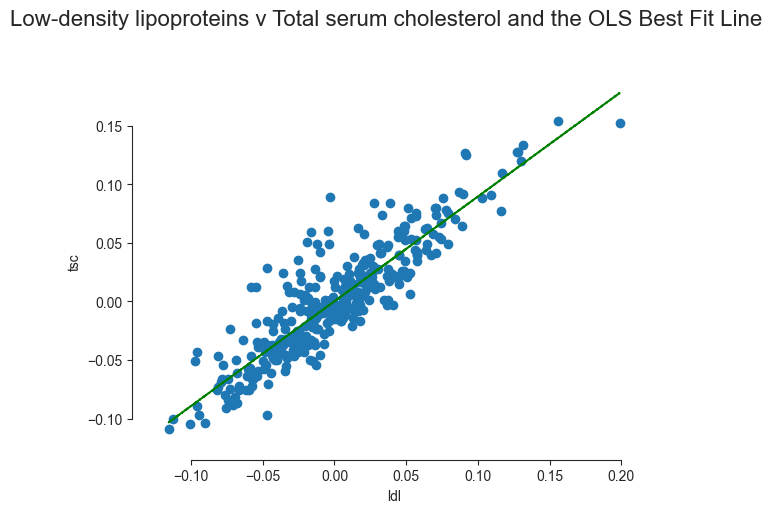

In [6]:
sns.set_style("ticks")
plt.suptitle('Low-density lipoproteins v Total serum cholesterol and the OLS Best Fit Line',y=1.02,fontsize=16)
plt.scatter(X_train,y_train)
plt.plot(X_train,b_ols+m_ols*X_train,'--g')
sns.despine(offset=10, trim=True)
plt.xlabel("ldl")
plt.ylabel("tsc")
plt.show()

## Batch Gradient Decent for Linear Regression
repeat until convergence:
$$\begin{cases}
b=b-\frac{lr}{n} \displaystyle\sum_{i=1}^{n} (mx_{i}+b)-y_{i}\\
m=m-\frac{lr}{n} \displaystyle\sum_{i=1}^{n} ((mx_{i}+b)-y_{i})*x_{i}
\end{cases}$$

this function is the derivative of the loss funciton (least squares)

where $lr$ is the learning rate that we will set to .01

In [7]:
def batch_gradient_decent(X_train,y_train,steps=1000,lr=.01):
    n=len(X_train)
    # start with random value
    b_curr=0.1
    m_curr=0.1
    for i in range(steps):
        # make an initial prediction
        y_pred=m_curr*X_train+b_curr
        SSE=np.sum((y_train-y_pred)**2)

        # take the derivative of the loss function for each parameter
        m_gradient = -(2/n) * sum(X_train * (y_train-y_pred))
        b_gradient = -(2/n) * sum(y_train-y_pred)

        # calculate step size = slope*learning rate and generate a new parameter
        m_step_size=m_gradient*lr
        b_step_size=b_gradient*lr

        # early stopping if step size is very small
        if np.abs(m_step_size) < 1e-10 or np.abs(b_step_size) < 1e-10 :
            print('***EARLY STOPPING***')
            break

        m_curr=m_curr-m_step_size
        b_curr=b_curr-b_step_size

        if (i+1) % 1000==0:
            print(f"Step [{i+1}/{steps}]: loss {SSE}")

    return m_curr,b_curr
m_bgd,b_bgd=batch_gradient_decent(X_train,y_train,steps=16000,lr=.1)

Step [1000/16000]: loss 0.36935076694198177
Step [2000/16000]: loss 0.24800640768009663
Step [3000/16000]: loss 0.19892371846317047
Step [4000/16000]: loss 0.17907021727515068
Step [5000/16000]: loss 0.17103965669032534
Step [6000/16000]: loss 0.16779136800331673
Step [7000/16000]: loss 0.16647746478539124
Step [8000/16000]: loss 0.16594600288886105
Step [9000/16000]: loss 0.16573103138745213
Step [10000/16000]: loss 0.16564407737114406
Step [11000/16000]: loss 0.16560890526273647
Step [12000/16000]: loss 0.16559467846491432
Step [13000/16000]: loss 0.165588923854644
Step [14000/16000]: loss 0.16558659616715046
Step [15000/16000]: loss 0.1655856546387388
Step [16000/16000]: loss 0.16558527379906318


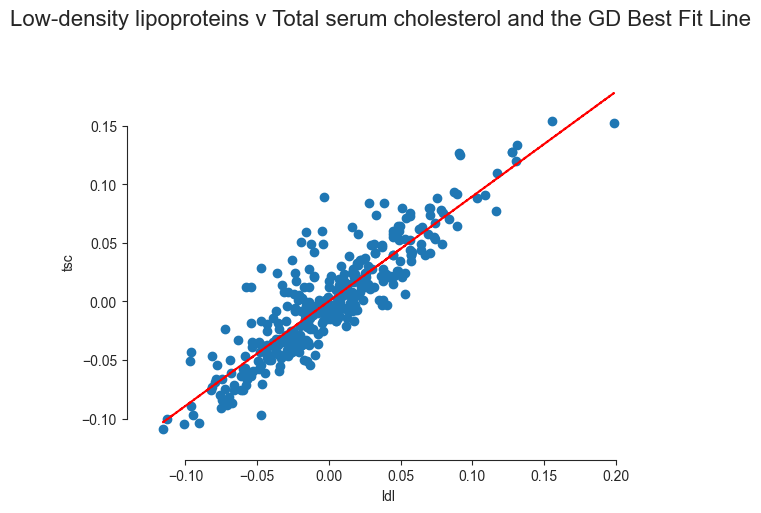

In [8]:
sns.set_style("ticks")
plt.suptitle('Low-density lipoproteins v Total serum cholesterol and the GD Best Fit Line',y=1.02,fontsize=16)
plt.scatter(X_train,y_train)
plt.plot(X_train,b_bgd+m_bgd*X_train,'--r')
sns.despine(offset=10, trim=True)
plt.xlabel("ldl")
plt.ylabel("tsc")
plt.show()

In [9]:
print(f"y={b_bgd:.6f}+{m_bgd:.6f}x")

y=0.000165+0.893387x
